<a href="https://colab.research.google.com/github/myamaak/NLP_disaster_tweets/blob/master/AI_team_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team #7 - Final presentation

#Explanation

Motivation & Explanation of problem

- Topic : Real or Not? NLP with Disaster Tweets (Kaggle)

- Motivation : Our team choose the topic dealing with NLP. The importance of NLP is increasing and the market for NLP is growing very fast. According to a report released by Research & Market, the market will grow from 10.2 billion dollars in 2019 up to 26.4 billion dollars in 2024 with 21.0% CAGR during the forecast period.
Furthermore, among many topics in Kaggle that deal with NLP technology, we choose the topic dealing with the data from Twitter. In These days, Twitter has become an important communication channel.
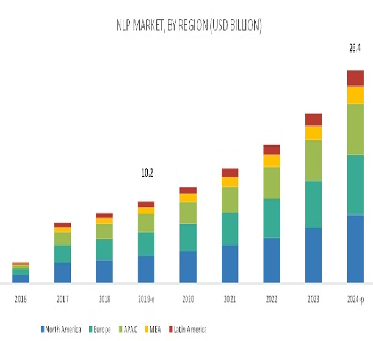
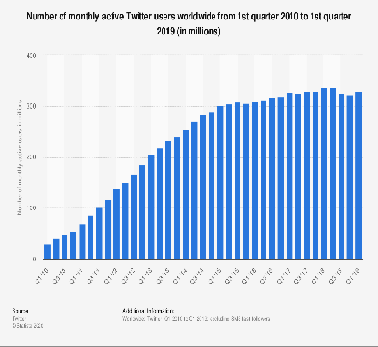

- Problem : Not always clear whether a person`s words are announcing a disaster for real!

- Goal : Classify the twitter texts whether real ot not

All Precess

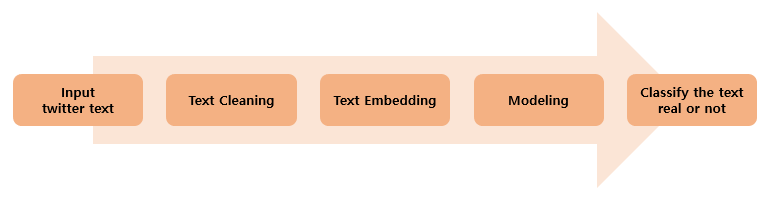

In [ ]:
import os
from google.colab import drive
import numpy as np 
import pandas as pd
import string  
import re   
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D, MaxPool1D, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate
from keras.layers.embeddings import Embedding
from keras.layers import MaxPool1D
from keras.models import Model
from keras import regularizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from tensorflow import keras
from keras.models import load_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.neighbors import KNeighborsClassifier
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#1.Input data

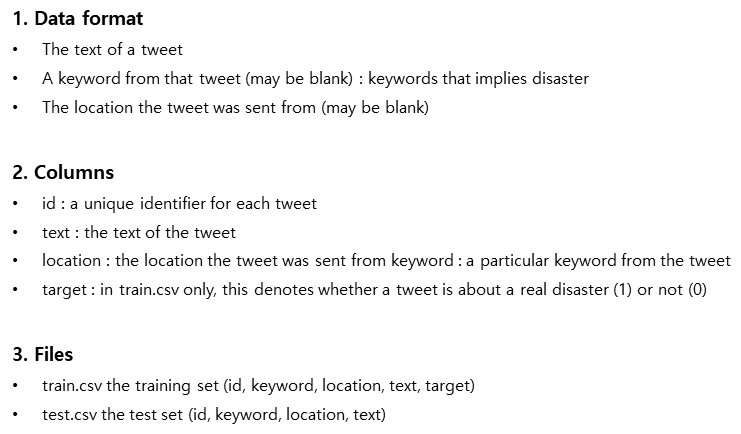

(1) Download the data

In [ ]:
#mount to gdrive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/gdrive/My Drive/AI Lecture/kaggle/train.csv')
test_data = pd.read_csv('/content/gdrive/My Drive/AI Lecture/kaggle/test.csv')
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


we picked a sample data to see if how it changes after data cleaning

In [ ]:
sample = train_data['text'][304] #noisy data #not disas
print(sample)

#PBBan (Temporary:300) avYsss @'aRmageddon | DO NOT KILL | FLAGS ONLY | Fast XP' for Reason


(2) See the distribution of traing samples briefly

Target of 0 is 57.0 % of total
Target of 1 is 43.0 % of total


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


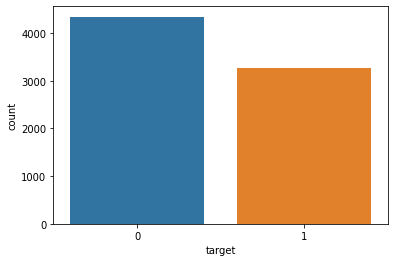

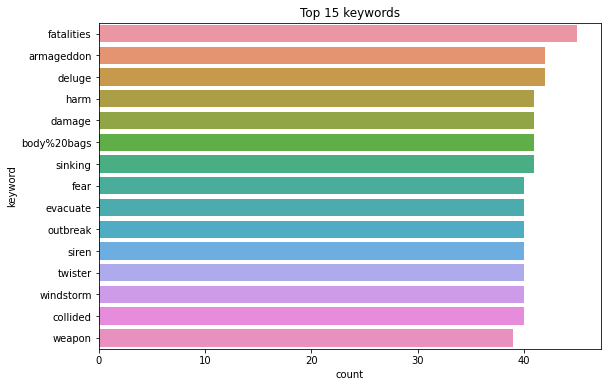

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
#See the distribution of target
import seaborn as sns
feature_1='target'
sns.countplot(feature_1, data=train_data)
print('Target of 0 is {} % of total'.format(round(train_data[feature_1].value_counts()[0]/len(train_data[feature_1])*100)))
print('Target of 1 is {} % of total'.format(round(train_data[feature_1].value_counts()[1]/len(train_data[feature_1])*100)))

#See the top 15 keywords of train_data
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.countplot(y=train_data.keyword, order = train_data.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

#Check the number of null vales
train_data.isnull().sum()


data length before cleaning is as follows.

In [ ]:
print(len(train_data))

7613


if we remove duplicates in data before cleaning, we can see there are some datas removed already. After cleaning, there will be even more duplicates.

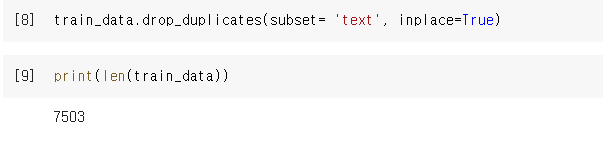

#2. Text Cleaning

text cleaning
- remove url
- remove html tags
- remove emojis
- remove punctuations
- spelling correction

+ convert all charters into lowercase
+ tokenization
+ removing stopwords
+ stemming and lemmatization
+ remove the words having length <=2

- remove duplicate at the end of cleaning!

**Text cleaning(1) : remove URL, HTML tag, emojis, punctuations**

we thought that emojis might also include some valuable information. So, instead of eliminating the whole emoji, we converted them into corresponding text.

In [ ]:
#remove url
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [ ]:
#remove html
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [ ]:
!pip install emoji

In [ ]:
#remove emoji

import emoji
def remove_emoji(text):
  return emoji.demojize(text)

In [ ]:
#remove punctuations

import string  
import re   

punct = string.punctuation  

def remove_punct(text):
  text  = "".join([char for char in text if char not in punct])
  text = re.sub('[0-9]+', '', text) #숫자 제거
  return text

**Text cleaning(2):correct spelling**

spellchecker is a popular module to correct spelling in python. However it cannot be used in colab

In [ ]:
# Install java
!apt-get update -qq
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!java -version

# Install pyspark
!pip install --ignore-installed -q pyspark==2.4.4

# Install Sparknlp
!pip install --ignore-installed spark-nlp

openjdk version "11.0.9.1" 2020-11-04
OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
     |████████████████████████████████| 215.7MB 64kB/s 
     |████████████████████████████████| 204kB 54.3MB/s 
     |████████████████████████████████| 133kB 15.6MB/s 


In [ ]:
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *
import sparknlp
from sparknlp.pretrained import PretrainedPipeline

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [ ]:
#start spark session
spark = sparknlp.start()

In [ ]:
#Select the NER model and construct the pipeline
document_assembler = DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("document")

tokenizer = RecursiveTokenizer()\
  .setInputCols(["document"])\
  .setOutputCol("token")\
  .setPrefixes(["\"", "(", "[", "\n"])\
  .setSuffixes([".", ",", "?", ")","!", "‘s"])

spell_model = ContextSpellCheckerModel\
    .pretrained('spellcheck_dl')\
    .setInputCols("token")\
    .setOutputCol("corrected")

finisher = Finisher().setInputCols("corrected")

light_pipeline = Pipeline(stages = [
                                    document_assembler,
                                    tokenizer,
                                    spell_model,
                                    finisher
                                    ])

empty_ds = spark.createDataFrame([[""]]).toDF("text")
l_pipeline_model = LightPipeline(light_pipeline.fit(empty_ds))

spellcheck_dl download started this may take some time.
Approximate size to download 112 MB
[OK!]


In [ ]:
#function to correct spellings
#input : single text sentence of str
# ex) "Plaese alliow me tao introdduce myhelf, I am a man of waelth und tiaste"
def correct_spelling(text):
  result = l_pipeline_model.annotate(text)
  result = ' '.join(result['corrected'])
  return result
  

**Text cleaning(3) Convert all charters into lowercase**

In [ ]:
def clean_lowercase(text):
  return str(text).lower()

**Text cleaning(4) Tokenization**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
def clean_tokenization(text):
  return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Text cleaning(5) Removing stopwords**

In [ ]:
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))
# def clean_stopwords(text):
#        return [item for item in text if item not in stop_words]

stop_words = ["the", "a", "to", "and", "of"]
def clean_stopwords(text):
       return [item for item in text if item not in stop_words]

**Text cleaning(6) Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
nltk.download("wordnet")
def clean_lemmatization(token):
  return [lemma.lemmatize(word=w,pos='v') for w in token]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Text cleaning(7) Remove the words with length<=2**

In [ ]:
def clean_length(token):
  return [i for i in token if len(i)>2]

**Text cleaning(8)  Convert the list of tokens into back to the string**

In [ ]:
def convert_tostring(token):
  return ' '.join(token)

**Text cleaning and saving (final)**

In [ ]:
def clean(this_text):
  this_text = remove_URL(this_text)
  this_text = remove_emoji(this_text)
  this_text = remove_punct(this_text)
  this_text = correct_spelling(this_text)
  this_text = clean_lowercase(this_text)
  this_text = clean_tokenization(str(this_text))
  this_text = clean_stopwords(this_text)
  this_text = clean_lemmatization(this_text)
  this_text = clean_length(this_text)
  this_text = convert_tostring(this_text)
  return this_text

Here, we will see how the formal, noisy data have changed after all the cleaning process.

This was the sample data :

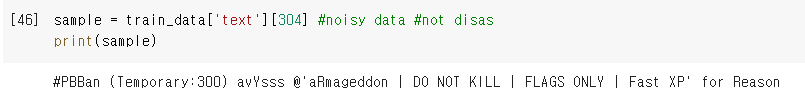

In [ ]:
clean(sample)

'bean temporary assess armageddon not kill flag only fast for reason'

we can see that text cleaning works fine. Now we clean the whole dataset.

In [ ]:
train=[]
for i in train_data['text']:
  train.append(clean(i))

In [ ]:
train[7610:]

['volcano hawaii',
 'police investigate after bike combine with car little portugal like river suffer serious online threaten injuries',
 'latest more home raze northern california wildlife abc news']

In [ ]:
for i in range(len(train)):
  train_data['text'][i] = train[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


After cleaning the data, we will remove duplicates again. At the beginning there were 7613 data, 7503 after removing original duplicates. Finally, only 6869 data remains.

In [ ]:
# remove duplicate here
train_data.drop_duplicates(subset= 'text', inplace=True)

In [ ]:
len(train_data)

6849

In [ ]:
test=[]
for i in test_data['text']:
  test.append(clean(i))

In [ ]:
train_data.tail(5)

,id,keyword,location,text,target
7601,10859,NaN,NaN,break refuge oil still may have outlier bigger...,1
7602,10860,NaN,NaN,site just off n't korney tornado warn,1
7603,10862,NaN,NaN,officials say quarantine place alabama home ov...,1
7605,10864,NaN,NaN,lip side kalmar there bomb everyone have evacu...,1
7606,10866,NaN,NaN,suicide somber kill saudi security site mosque...,1


Since the data cleaning takes a significant amount of time, we will save the cleaned data into a new file. 

In [ ]:
import csv

train_data.to_csv('/content/gdrive/My Drive/AI Lecture/nlp_train.csv')

In [ ]:
with open('/content/gdrive/My Drive/AI Lecture/nlp_train1.txt', 'w') as f:
    for item in train_data['text']:
        f.write("%s\n" % item)

with open('/content/gdrive/My Drive/AI Lecture/nlp_trainY1.txt', 'w') as f:
    for item in train_data['target']:
        f.write("%s\n" % item)

with open('/content/gdrive/My Drive/AI Lecture/keyword.txt', 'w') as f:
    for item in train_data['keyword']:
        f.write("%s\n" % item)

Read saved cleaned data

In [ ]:
trainF = pd.read_csv('/content/gdrive/My Drive/AI Lecture/nlp_train.csv')
train = trainF['text']
Y = trainF['target']
keyword = trainF['keyword']

In [ ]:
trainF = open('/content/gdrive/My Drive/AI Lecture/nlp_train1.txt', 'r')
train = []
for i in trainF:
  train.append(i.strip())

trainF = open('/content/gdrive/My Drive/AI Lecture/keyword.txt', 'r')
key = []
for i in trainF:
  key.append(i.strip())

Y = np.loadtxt('/content/gdrive/My Drive/AI Lecture/nlp_trainY1.txt')

#3.Embedding
-> We use glove model for embedding 

"Tokenizing the training samples"

In [ ]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
max_words = 10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train)
sequences = tokenizer.texts_to_sequences(train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12166 unique tokens.


"Mapping the pre-trained Glove embedding vector to training samples"

In [ ]:
glove_dir = '/content/gdrive/My Drive/AI Lecture/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [ ]:
X = pad_sequences(sequences,maxlen=maxlen,truncating='post',padding='post')

split the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.10, random_state=42)
print('Shape of train',X_train.shape)
print("Shape of test ",X_test.shape)

Shape of train (6164, 100)
Shape of test  (685, 100)


In [ ]:
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test)
sequences = tokenizer.texts_to_sequences(test)

test = pad_sequences(sequences,maxlen=maxlen,truncating='post',padding='post')

#4.Modeling

**(1) CNN model**

Baseline model


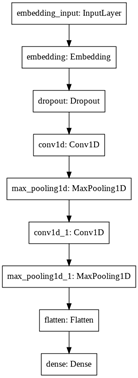 

test accuracy : 0.7677

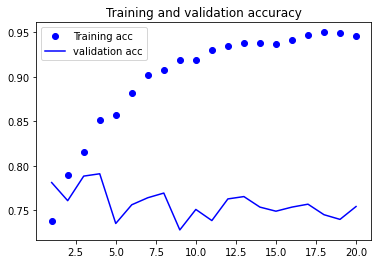 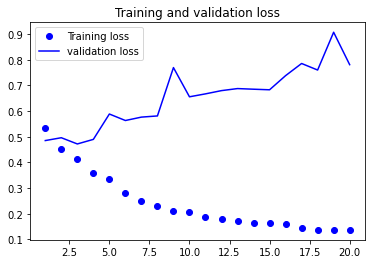



In [ ]:
#baseline model
cnn1 = Sequential()
cnn1.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False))
cnn1.add(Conv1D(128, 5, activation='relu'))
cnn1.add(MaxPooling1D(5))
cnn1.add(Dropout(0.5))
cnn1.add(Conv1D(128, 5,activation='relu'))
cnn1.add(MaxPooling1D(15))
cnn1.add(Flatten())
cnn1.add(Dense(1, activation='sigmoid'))

cnn1.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# dropput rate (what is spatial dropout?), optimizer, convnet size?

cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 128)           82048     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Mutlichannel CNN model

> 3 different convolution layers of filter size 3,4,5 were added. Each channel work as skip-gram models where different filter sizes meaning the number of words the filter is being applied to.
Maximum 5 words were set because words farther away than that were generally less relevant or useful with respect to identifying patterns in a phrase according to the reference.

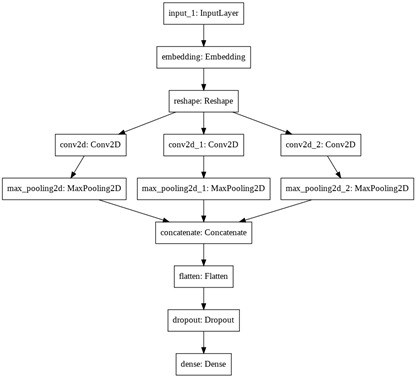

Test accuracy: 0.7782

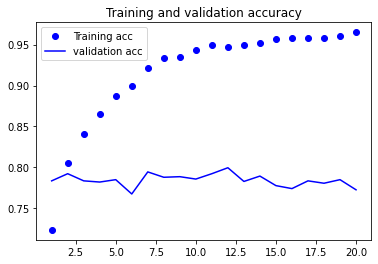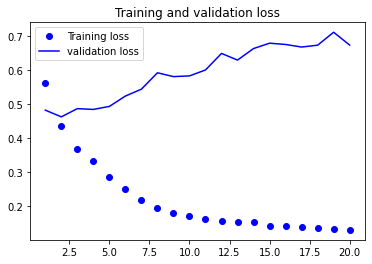

We can see that this model is working somewhat better than the first model.

In [ ]:
def create_model():
  num_filters = 128

  Embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)

  input = Input(shape=(maxlen,))
  embedding = Embedding_layer(input)

  print(embedding.shape)
  reshape = Reshape((maxlen,embedding_dim,1))(embedding)
  print(reshape.shape)

  conv1 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer='l2')(reshape)
  conv2 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)
  conv3 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)

  maxpooling1 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv1)
  maxpooling2 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv2)
  maxpooling3 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv3)

  concatenated_tensor = Concatenate(axis=1)([maxpooling1, maxpooling2, maxpooling3])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.5)(flatten)
  output_layer = Dense(1, activation='sigmoid', kernel_regularizer='l2')(dropout)

  # this creates a model that includes
  model = Model(inputs=input, outputs=output_layer)

  opt = keras.optimizers.Adam(learning_rate = 0.0001)
  model.compile(loss ='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

(None, 100, 100)
(None, 100, 100, 1)


In [ ]:
callback = [keras.callbacks.ModelCheckpoint(filepath='best.h5', monitor='val_loss', mode='min', save_best_only=True),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto',baseline=None, restore_best_weights=False)]

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20, shuffle=True, callbacks=callback)

Epoch 1/100
247/247 [==============================] - 2s 6ms/step - loss: 4.0803 - accuracy: 0.6337 - val_loss: 3.5066 - val_accuracy: 0.7421
Epoch 2/100
247/247 [==============================] - 1s 5ms/step - loss: 3.2075 - accuracy: 0.7171 - val_loss: 2.8303 - val_accuracy: 0.7551
Epoch 3/100
247/247 [==============================] - 1s 5ms/step - loss: 2.6057 - accuracy: 0.7394 - val_loss: 2.3266 - val_accuracy: 0.7672
Epoch 4/100
247/247 [==============================] - 1s 5ms/step - loss: 2.1494 - accuracy: 0.7566 - val_loss: 1.9523 - val_accuracy: 0.7713
Epoch 5/100
247/247 [==============================] - 1s 5ms/step - loss: 1.8079 - accuracy: 0.7725 - val_loss: 1.6664 - val_accuracy: 0.7721
Epoch 6/100
247/247 [==============================] - 1s 4ms/step - loss: 1.5460 - accuracy: 0.7832 - val_loss: 1.4446 - val_accuracy: 0.7745
Epoch 7/100
247/247 [==============================] - 1s 5ms/step - loss: 1.3360 - accuracy: 0.7942 - val_loss: 1.2707 - val_accuracy: 0.7753

**Hyper parameter tunning**

1.   Batch size
2.   Optimizer
3.   Optimizer learning rate
4.   L1 vs L2
5.   Drop out rate

**batch size** : 20

In [ ]:
tune_model = KerasClassifier(build_fn = create_model, epochs=30, verbose=0)

In [ ]:
# grid search hyperparameter tunnig
batch_size = [4, 10, 20, 40]
param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(None, 100, 100)
(None, 100, 100, 1)
Best: 0.787963 using {'batch_size': 20}
0.772552 (0.012971) with: {'batch_size': 4}
0.782610 (0.007310) with: {'batch_size': 10}
0.787963 (0.005751) with: {'batch_size': 20}
0.783745 (0.006409) with: {'batch_size': 40}


**Optimizer** : SGD

In [ ]:
def create_model(optimizer='adam'):
  num_filters = 128

  embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)
  inputs = Input(shape=(maxlen,))
  embedding = embedding_layer(inputs)

  reshape = Reshape((maxlen,embedding_dim,1))(embedding)

  conv_0 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer='l2')(reshape)
  conv_1 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)
  conv_2 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)

  maxpool_0 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)
  maxpool_1 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)
  maxpool_2 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

  concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.5)(flatten)
  output = Dense(1, activation='sigmoid', kernel_regularizer='l2')(dropout)

  # this creates a model that includes
  model = Model(inputs=inputs, outputs=output)

  model.compile(loss ='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
tune_model = KerasClassifier(build_fn = create_model, epochs=30, batch_size=20, verbose=0)

In [ ]:
# grid search hyperparameter tunnig
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(None, 100, 100)
(None, 100, 100, 1)
Best: 0.787801 using {'optimizer': 'SGD'}
0.787801 (0.007704) with: {'optimizer': 'SGD'}
0.771577 (0.009763) with: {'optimizer': 'RMSprop'}
0.772551 (0.007782) with: {'optimizer': 'Adagrad'}
0.704578 (0.013260) with: {'optimizer': 'Adadelta'}
0.769793 (0.009609) with: {'optimizer': 'Adam'}
0.779527 (0.007203) with: {'optimizer': 'Adamax'}
0.777256 (0.011834) with: {'optimizer': 'Nadam'}


**Learning rate & momentum** : 'learn_rate': 0.01, 'momentum': 0.4

In [ ]:

def create_model(learn_rate=0.01, momentum=0):
  num_filters = 128

  Embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)

  input = Input(shape=(maxlen,))
  embedding = Embedding_layer(input)

  reshape = Reshape((maxlen,embedding_dim,1))(embedding)

  conv1 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer='l2')(reshape)
  conv2 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)
  conv3 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)

  maxpooling1 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv1)
  maxpooling2 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv2)
  maxpooling3 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv3)

  concatenated_tensor = Concatenate(axis=1)([maxpooling1, maxpooling2, maxpooling3])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.5)(flatten)
  output_layer = Dense(1, activation='sigmoid', kernel_regularizer='l2')(dropout)

  # this creates a model that includes
  model = Model(inputs=input, outputs=output_layer)

  opt = keras.optimizers.SGD(lr=learn_rate, momentum=momentum)
  model.compile(loss ='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
tune_model = KerasClassifier(build_fn = create_model, epochs=30, batch_size=20, verbose=0)

learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(None, 100, 100)
(None, 100, 100, 1)
(

**Dropout regularization** : 0.6

In [ ]:
def create_model(dropout_rate=0.0):
  num_filters = 128

  Embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)

  input = Input(shape=(maxlen,))
  embedding = Embedding_layer(input)

  reshape = Reshape((maxlen,embedding_dim,1))(embedding)

  conv1 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer='l2')(reshape)
  conv2 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)
  conv3 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer='l2')(reshape)

  maxpooling1 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv1)
  maxpooling2 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv2)
  maxpooling3 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv3)

  concatenated_tensor = Concatenate(axis=1)([maxpooling1, maxpooling2, maxpooling3])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(dropout_rate)(flatten)
  output_layer = Dense(1, activation='sigmoid', kernel_regularizer='l2')(dropout)

  # this creates a model that includes
  model = Model(inputs=input, outputs=output_layer)

  opt = keras.optimizers.SGD(lr=0.01, momentum=0.4)
  model.compile(loss ='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
tune_model = KerasClassifier(build_fn = create_model, epochs=30, batch_size=20, verbose=0)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

param_grid = dict(dropout_rate = dropout_rate)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.790233 using {'dropout_rate': 0.6}
0.782285 (0.004869) with: {'dropout_rate': 0.0}
0.785041 (0.005342) with: {'dropout_rate': 0.1}
0.786016 (0.010133) with: {'dropout_rate': 0.2}
0.786015 (0.002674) with: {'dropout_rate': 0.3}
0.763631 (0.021347) with: {'dropout_rate': 0.4}
0.783582 (0.001205) with: {'dropout_rate': 0.5}
0.790233 (0.003579) with: {'dropout_rate': 0.6}
0.786341 (0.002819) with: {'dropout_rate': 0.7}
0.777253 (0.009020) with: {'dropout_rate': 0.8}
0.779040 (0.003763) with: {'dropout_rate': 0.9}


**l1 vs l2** : l2

In [ ]:
def create_model(reg = 'l1'):
  num_filters = 128

  Embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)

  input = Input(shape=(maxlen,))
  embedding = Embedding_layer(input)

  reshape = Reshape((maxlen,embedding_dim,1))(embedding)

  conv1 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer=reg)(reshape)
  conv2 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer=reg)(reshape)
  conv3 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer=reg)(reshape)

  maxpooling1 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv1)
  maxpooling2 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv2)
  maxpooling3 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv3)

  concatenated_tensor = Concatenate(axis=1)([maxpooling1, maxpooling2, maxpooling3])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.6)(flatten)
  output_layer = Dense(1, activation='sigmoid', kernel_regularizer=reg)(dropout)

  # this creates a model that includes
  model = Model(inputs=input, outputs=output_layer)

  opt = keras.optimizers.SGD(lr= 0.01, momentum=0.4)
  model.compile(loss ='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
tune_model = KerasClassifier(build_fn = create_model, epochs=30, batch_size=20, verbose=0)

reg = ['l1','l2']

param_grid = dict(reg = reg)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780336 using {'reg': 'l2'}
0.590040 (0.005088) with: {'reg': 'l1'}
0.780336 (0.007414) with: {'reg': 'l2'}


**Final CNN model**

In [ ]:

def create_model():
  num_filters = 128
  reg = 'l2'

  Embedding_layer = Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable = False)

  input = Input(shape=(maxlen,))
  embedding = Embedding_layer(input)

  reshape = Reshape((maxlen,embedding_dim,1))(embedding)

  conv1 = Conv2D(num_filters, kernel_size=(3, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu' , kernel_regularizer=reg)(reshape)
  conv2 = Conv2D(num_filters, kernel_size=(4, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer=reg)(reshape)
  conv3 = Conv2D(num_filters, kernel_size=(5, embedding_dim), 
                padding='valid', kernel_initializer='normal', activation='relu', kernel_regularizer=reg)(reshape)

  maxpooling1 = MaxPool2D(pool_size=(maxlen - 3 + 1, 1), strides=(1,1), padding='valid')(conv1)
  maxpooling2 = MaxPool2D(pool_size=(maxlen - 4 + 1, 1), strides=(1,1), padding='valid')(conv2)
  maxpooling3 = MaxPool2D(pool_size=(maxlen - 5 + 1, 1), strides=(1,1), padding='valid')(conv3)

  concatenated_tensor = Concatenate(axis=1)([maxpooling1, maxpooling2, maxpooling3])
  flatten = Flatten()(concatenated_tensor)
  dropout = Dropout(0.6)(flatten)
  output_layer = Dense(1, activation='sigmoid', kernel_regularizer=reg)(dropout)

  # this creates a model that includes
  model = Model(inputs=input, outputs=output_layer)

  opt = keras.optimizers.SGD(lr= 0.01, momentum=0.4)
  model.compile(loss ='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

In [ ]:
callback = [keras.callbacks.ModelCheckpoint(filepath='best.h5', monitor='val_loss', mode='min', save_best_only=True),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto',baseline=None, restore_best_weights=False)]

# history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20, shuffle=True, callbacks=callback)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=20, shuffle=True, callbacks=callback)

Epoch 1/100
247/247 [==============================] - 2s 6ms/step - loss: 4.1883 - accuracy: 0.6455 - val_loss: 3.7759 - val_accuracy: 0.7470
Epoch 2/100
247/247 [==============================] - 1s 5ms/step - loss: 3.5525 - accuracy: 0.7147 - val_loss: 3.2621 - val_accuracy: 0.7559
Epoch 3/100
247/247 [==============================] - 1s 5ms/step - loss: 3.0729 - accuracy: 0.7412 - val_loss: 2.8373 - val_accuracy: 0.7599
Epoch 4/100
247/247 [==============================] - 1s 5ms/step - loss: 2.6695 - accuracy: 0.7530 - val_loss: 2.4797 - val_accuracy: 0.7616
Epoch 5/100
247/247 [==============================] - 1s 5ms/step - loss: 2.3308 - accuracy: 0.7690 - val_loss: 2.1964 - val_accuracy: 0.7599
Epoch 6/100
247/247 [==============================] - 1s 5ms/step - loss: 2.0472 - accuracy: 0.7755 - val_loss: 1.9223 - val_accuracy: 0.7689
Epoch 7/100
247/247 [==============================] - 1s 5ms/step - loss: 1.8044 - accuracy: 0.7921 - val_loss: 1.7095 - val_accuracy: 0.7721

In [ ]:
# load a saved model
saved_model = load_model('best.h5')
saved_model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.8015


[0.5731400847434998, 0.8014598488807678]



*   Accuracy: 0.801460
*   Precision: 0.786290
*   Recall: 0.701439
*   F1 score: 0.741445


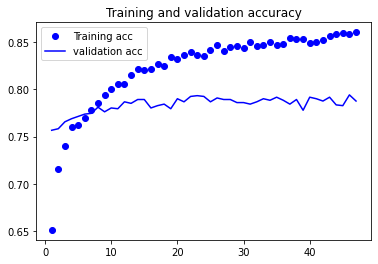 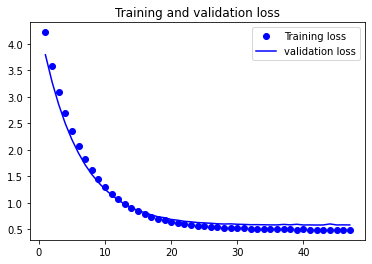





**(2)LSTM model**

Predict a binary outcome using LSTM Model

- Number of hidden nodes = 32

- Dropout rate = 0.2

- Activation Function = "Sigmoid"

- Loss Function = "binary_crossentropy"

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model_save_folder_path = '/content/gdrive/My Drive/AI Lecture/'
if not os.path.exists(model_save_folder_path):
  os.mkdir(model_save_folder_path)
model_path = model_save_folder_path + 'best_lstm.hdf5'
modelckpt = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

model_1 = Sequential()
model_1.add(Embedding(max_words, 100))
model_1.add(LSTM(32))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='sigmoid'))
model_1.summary()
model_1.layers[0].set_weights([embedding_matrix])
model_1.layers[0].trainable = False
model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model_1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[modelckpt])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
38/44 [========================>.....] - ETA: 0s - loss: 0.6827 - acc: 0.5925
Epoch 00001: val_loss improved from inf to 0.69131, saving model to /content/gdrive/My Drive/AI Lecture/best_lstm.hdf5
44/44 [===========================

When epoch is 15, Model have best validation accuracy 0.7909

**(3)SVM model**

In [ ]:
sv = svm.SVC()
sv.fit(X_train, y_train)

pred= sv.predict(X_test)
# print("svm accuracy -> ", accuracy_score(pred, y_test)*100)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.60      0.97      0.74       407
         1.0       0.57      0.06      0.10       278

    accuracy                           0.60       685
   macro avg       0.59      0.51      0.42       685
weighted avg       0.59      0.60      0.48       685



Hyperparameter tuning


1.   Kernel
2.   C, gamma



**kernel** : rbf

In [ ]:
#hyperparameter tuning
sv = svm.SVC(kernel='RBF')

kernel = ['poly', 'rbf', 'sigmoid']

param_grid = {'kernel': kernel}
  
grid = GridSearchCV(sv, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

print(grid.best_params_) 
#print tuned model
print(grid.best_estimator_) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] kernel=poly .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... kernel=poly, score=0.590, total=   5.1s
[CV] kernel=poly .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ......................... kernel=poly, score=0.588, total=   4.9s
[CV] kernel=poly .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


[CV] ......................... kernel=poly, score=0.581, total=   4.7s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.579, total=   4.7s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.572, total=   4.5s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.596, total=   4.7s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.591, total=   4.7s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.577, total=   4.8s
[CV] kernel=rbf ......................................................
[CV] .......................... kernel=rbf, score=0.586, total=   4.8s
[CV] kernel=rbf ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


{'kernel': 'rbf'}
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**C & gamma** : 'C'=1, 'gamma'=0.0001

In [ ]:
#hyperparameter tuning

sv = svm.SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(sv, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 


print(grid.best_params_) 
  
print(grid.best_estimator_) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   4.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.590, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.590, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.5min finished


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
sv = svm.SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

sv.fit(X_train, y_train)

pred= sv.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75       407
         1.0       0.67      0.01      0.03       278

    accuracy                           0.60       685
   macro avg       0.63      0.50      0.39       685
weighted avg       0.62      0.60      0.45       685



**(4)K-NN model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

In [ ]:
test_accuracy

[0.5737226277372263,
 0.5722627737226277,
 0.5708029197080292,
 0.5664233576642336,
 0.5605839416058395,
 0.583941605839416,
 0.564963503649635,
 0.5751824817518248,
 0.564963503649635,
 0.5664233576642336,
 0.5664233576642336,
 0.5635036496350365,
 0.5547445255474452,
 0.5766423357664233,
 0.5693430656934306,
 0.5664233576642336,
 0.5605839416058395,
 0.5708029197080292,
 0.5708029197080292,
 0.5795620437956205,
 0.581021897810219,
 0.5664233576642336,
 0.5678832116788322,
 0.5678832116788322,
 0.5620437956204379,
 0.5562043795620438,
 0.5562043795620438,
 0.5591240875912409,
 0.5678832116788322]

In [ ]:
test_accuracy .index(max(test_accuracy ))

5

In [ ]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
knn_acc =clf.score(X_test, y_test)
print(knn_acc)

0.583941605839416


When the value of neighbor is 6, this model have best accuracy with 0.5839

#5.Model ensemble

In [ ]:
cnn_model = load_model('/content/gdrive/My Drive/AI Lecture/best_cnn.h5')
lstm_model = load_model('/content/gdrive/My Drive/AI Lecture/best_lstm.hdf5')

**Majority voting ensemble** (hard voting) 

 -> Does not perform any better

In [ ]:
def get_pred(model):
  pred_prob = saved_model.predict(X_test)
  pred_prob = pred_prob[:, 0]
  pred_class = []
  for i in pred_prob:
    if i>=0.5:
      pred_class.append(1)
    else:
      pred_class.append(0)
  return pred_class

In [ ]:
cnn_pred_class = get_pred(cnn_model)
lstm_pred_class = get_pred(lstm_model)
knn_pred_class = clf.predict(X_test)
sv_pred_class = sv.predict(X_test)

In [ ]:
#hard voting
final_pred = []
for i in range(len(X_test)):
  this_t = [int(cnn_pred_class[i]), int(lstm_pred_class[i]), int(knn_pred_class[i]), int(sv_pred_class[i])]
  try:
    p = mode(this_t)
  except:
    p = this_t[0]
  final_pred.append(p)

In [ ]:
accuracy = accuracy_score(y_test,final_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, final_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test,final_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test,final_pred)
print('F1 score: %f' % f1)

Accuracy: 0.801460
Precision: 0.786290
Recall: 0.701439
F1 score: 0.741445


**Weighted average ensemble**

1.   Weighted average : 0.3, 0.3, 0.2, 0.2

*   Accuracy: 0.877677
*   Precision: 0.906006
*   Recall: 0.782574
*   F1 score: 0.839779

2.   Weighted average : 0.4, 0.4, 0.1, 0.1

*   Accuracy: 0.846690
*   Precision: 0.865402
*   Recall: 0.740990
*   F1 score: 0.798378



In [ ]:
def weight_av(X):
  cnn_pred = cnn_model.predict(X)
  lstm_pred = lstm_model.predict(X)
  knn_pred = clf.predict_proba(X)
  sv_pred = sv.predict_proba(X)

  knn_p = [i[1] for i in knn_pred]
  sv_p = [i[1] for i in sv_pred]

  final_p = []
  for i in range(len(X)):
    this_t = [cnn_pred[i], lstm_pred[i], knn_p[i], sv_p[i]]
    p = this_t[0]*0.3 + this_t[1]*0.3 + this_t[2]*0.2 + this_t[3]*0.2
    if p>=0.5:
      final_p.append(1)
    else:
      final_p.append(0)
  return final_p

In [ ]:
final_p = weight_av(X_train)

In [ ]:
accuracy = accuracy_score(y_train, final_p)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_train, final_p)
print('Precision: %f' % precision)

recall = recall_score(y_train,final_p)
print('Recall: %f' % recall)

f1 = f1_score(y_train, final_p)
print('F1 score: %f' % f1)

Accuracy: 0.877677
Precision: 0.906006
Recall: 0.782574
F1 score: 0.839779


In [ ]:
final_p = weight_av(X_test)

In [ ]:
accuracy = accuracy_score(y_test, final_p)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, final_p)
print('Precision: %f' % precision)

recall = recall_score(y_test,final_p)
print('Recall: %f' % recall)

f1 = f1_score(y_test, final_p)
print('F1 score: %f' % f1)

Accuracy: 0.807299
Precision: 0.823009
Recall: 0.669065
F1 score: 0.738095


**Use keyword column**

In [ ]:
train_data = train_data.fillna('None')
ag = train_data.groupby('keyword').agg({'text':np.size, 'target':np.mean}).rename(columns={'text':'Count', 'target':'Disaster Probability'})
ag.sort_values('Disaster Probability', ascending=False).head(10)

,Count,Disaster Probability
keyword,,
debris,31,1.000000
derailment,29,1.000000
wreckage,15,1.000000
suicide%20bombing,29,0.965517
suicide%20bomber,26,0.961538
oil%20spill,24,0.958333
typhoon,22,0.954545
outbreak,20,0.950000
bombing,23,0.913043


In [ ]:
disaster = list(ag[(ag['Count']>2) & (ag['Disaster Probability']>=0.9)].index)

In [ ]:
disaster

['bombing',
 'debris',
 'derailment',
 'evacuated',
 'nuclear%20disaster',
 'oil%20spill',
 'outbreak',
 'suicide%20bomber',
 'suicide%20bombing',
 'typhoon',
 'wreckage']

In [ ]:
def use_key(data, pred):
  cn=0
  for i in range(len(data)):
    ind = train_data[train_data['text']==data[i]].index.values
    this_k = train_data['keyword'][ind].item()
    if this_k in disaster:
      pred[i] = 1
      cn+=1
  print(cn)
  return pred

In [ ]:
X_train_w,X_test_w,y_train_w,y_test_w=train_test_split(train,Y,test_size=0.10, random_state=42)

In [ ]:
new_final = use_key(X_test_w, final_p)

21


In [ ]:
accuracy = accuracy_score(y_test, new_final)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, new_final)
print('Precision: %f' % precision)

recall = recall_score(y_test,new_final)
print('Recall: %f' % recall)

f1 = f1_score(y_test, new_final)
print('F1 score: %f' % f1)

Accuracy: 0.805839
Precision: 0.819383
Recall: 0.669065
F1 score: 0.736634


Accuracy decreases as we adjust keyword on the test set, while it slightly increases on train set.


1.   Train data

(without keyword)

Accuracy: 0.877677
Precision: 0.906006
Recall: 0.782574
F1 score: 0.839779

(adjusting keyword)

Accuracy: 0.878164
Precision: 0.903182
Recall: 0.786931
F1 score: 0.841058

2. Test data

(without keyword)

Accuracy: 0.807299
Precision: 0.823009
Recall: 0.669065
F1 score: 0.738095

(Adjusting keyword)

Accuracy: 0.805839
Precision: 0.819383
Recall: 0.669065
F1 score: 0.736634

Meaning that using keyword information might be good on large dataset. However, the change is subtle and our test data is small. We will not adjust keyword data in current evaluation.


**Result**


Evaluation on test data


*   Accuracy: 0.807299
*   Precision: 0.823009
*   Recall: 0.669065
*   F1 score: 0.738095




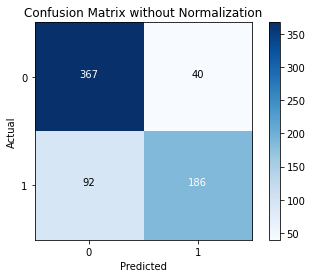







# 6. Submit for kaggle

In [ ]:
from keras.preprocessing.text import Tokenizer
maxlen = 100
max_words = 10000

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test)
sequences = tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7578 unique tokens.


In [ ]:
glove_dir = '/content/gdrive/My Drive/AI Lecture/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

Found 400000 word vectors.


In [ ]:
sample_x = pad_sequences(sequences,maxlen=maxlen,truncating='post',padding='post')

In [ ]:
len(sample_x)

3263

In [ ]:
cnn_pred = cnn_model.predict(sample_x)
lstm_pred = lstm_model.predict(sample_x)
knn_pred = kn.predict_proba(sample_x)
sv_pred = sv.predict_proba(sample_x)

In [ ]:
knn_p = [i[1] for i in knn_pred]
sv_p = [i[1] for i in sv_pred]

In [ ]:
y = []
for i in range(len(sample_x)):
  this_t = [cnn_pred[i], lstm_pred[i], knn_p[i], sv_p[i]]
  p = this_t[0]*0.3 + this_t[1]*0.3 + this_t[2]*0.2 + this_t[3]*0.2
  if p>=0.5:
    y.append(1)
  else:
    y.append(0)

In [ ]:
import pandas as pd

y=np.round(y).astype(int).reshape(3263)
sub=pd.DataFrame({'id':test_data['id'].values.tolist(),'target':y})
sub.to_csv('/content/gdrive/My Drive/AI Lecture/kaggle_nlp_submission.csv',index=False)

# Plotting model data

model architecture

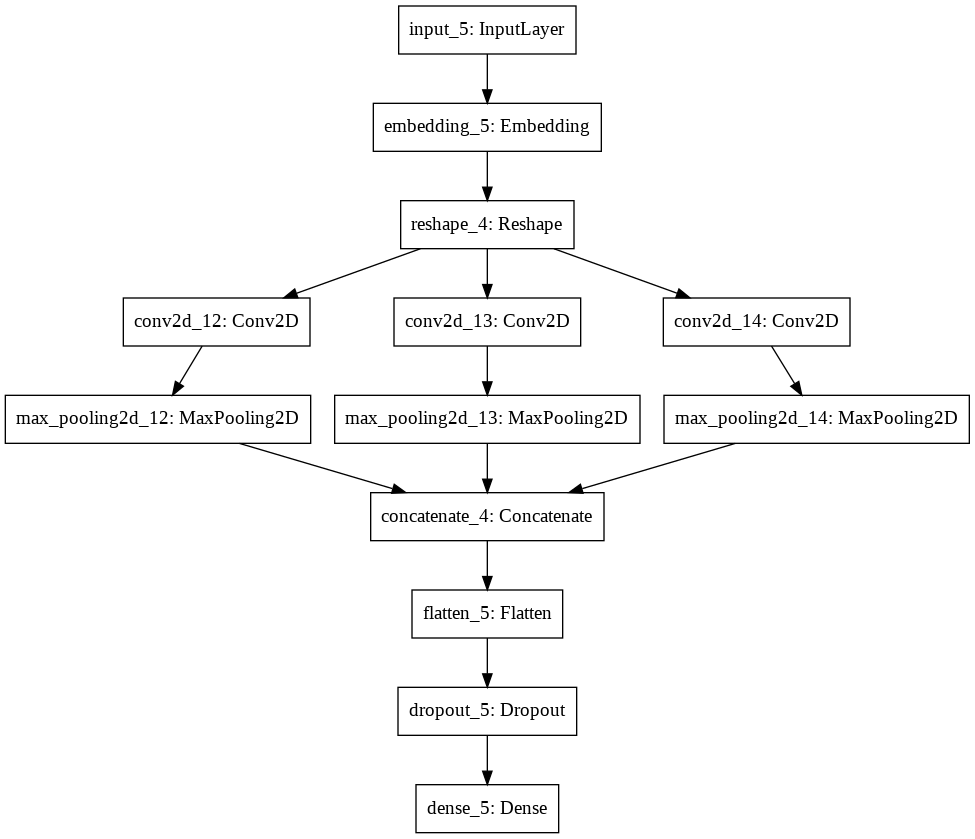

In [ ]:
plot_model(model, to_file='model.png')

validation data/ train data graph

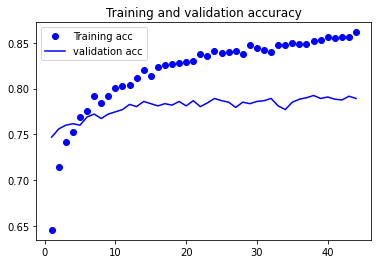

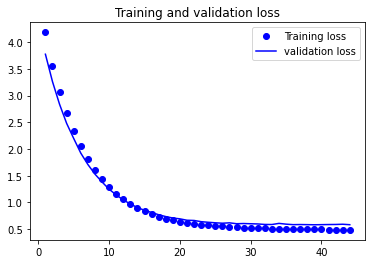

In [ ]:

acc = history.history['accuracy']
val_acc =history.history['val_accuracy']
loss = history.history['loss']
val_loss =  history.history['val_loss']

epochs  = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,final_p)
cf

array([[367,  40],
       [ 92, 186]])

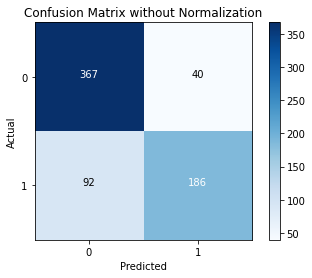

In [ ]:
import itertools
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix without Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(final_p)))
class_labels = ['0','1']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
    plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

# Trouble Shooting

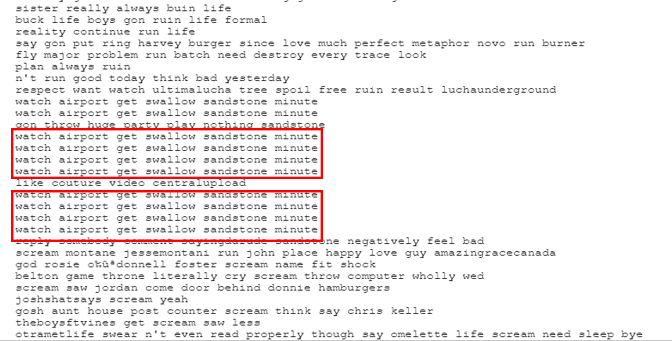

When we make cleaning texts, there are many duplications.

So we think some ways for deaing with this problem

1. When get rid of stopwords, Decrease the range of stopwords

2. After get rid of stop words, we get rid of those duplication sentences

First we chooese first way. When get rid of stopwords, Decrease the range of stopwords

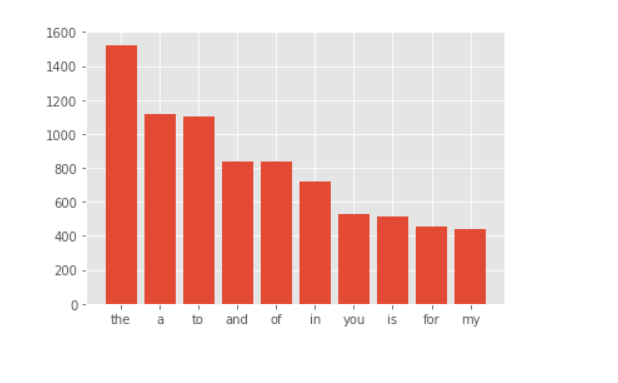

We get rid of only some stopwords that have most frequency
["the","a","to","and","of"]

But this situation is not improved

Therefore, we choose number 2 way

-> After get rid of stop words, we get rid of those duplication sencences

# References

preprocessing:  https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

preprocessing:https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95

spelling correction: https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/SPELL_CHECKER_EN.ipynb#scrollTo=uAiXj3DOfyZ-

second cnn model(multi input) : https://www.kaggle.com/au1206/text-classification-using-cnn  
https://cezannec.github.io/CNN_Text_Classification/ 

cnn text classification : https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9

tuning a model : https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

ensemble method : https://www.toptal.com/machine-learning/ensemble-methods-machine-learning#:~:text=Majority%20Voting,stable%20prediction%20for%20this%20instance.

knn : https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/

using keyword : https://www.kaggle.com/bandits/using-keywords-for-prediction-improvement

#Contribution



*   Choi Woo Seok: Motivation , Late part of cleaning, Embedding , LSTM Model , K-NN Model
*   Nam Da Young : Early part of cleaning, CNN Model, SVM Model, Model ensemble, plotting model data



#git repository

Nam Dayoung :

https://github.com/myamaak/NLP_disaster_tweets.git

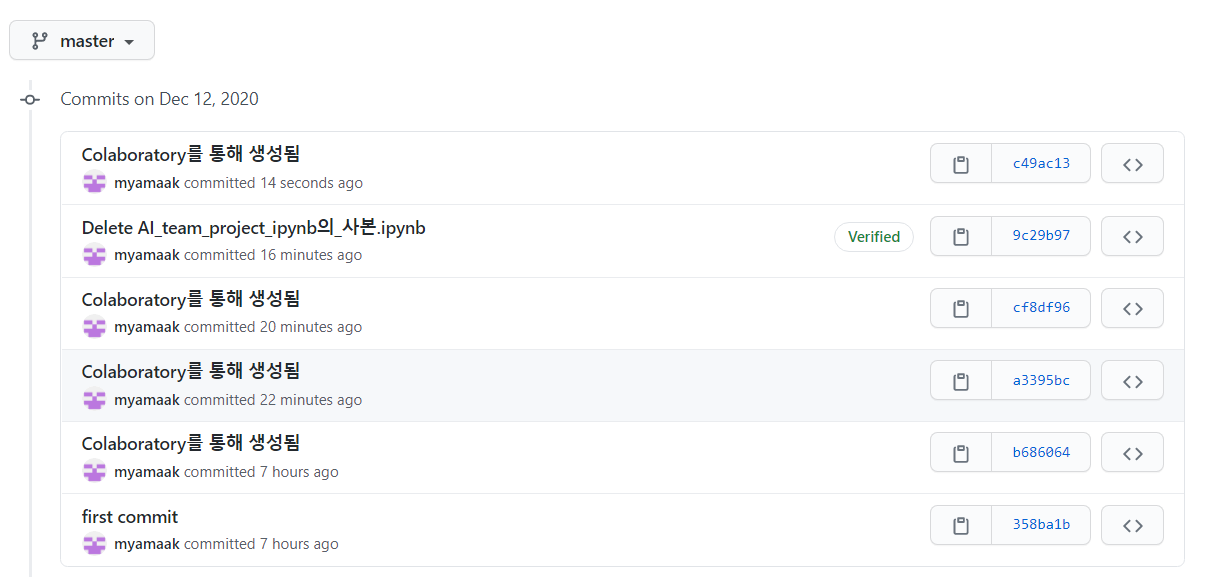

Choi Wooseok:

https://github.com/duyg5/AI_NLP_TWITTES

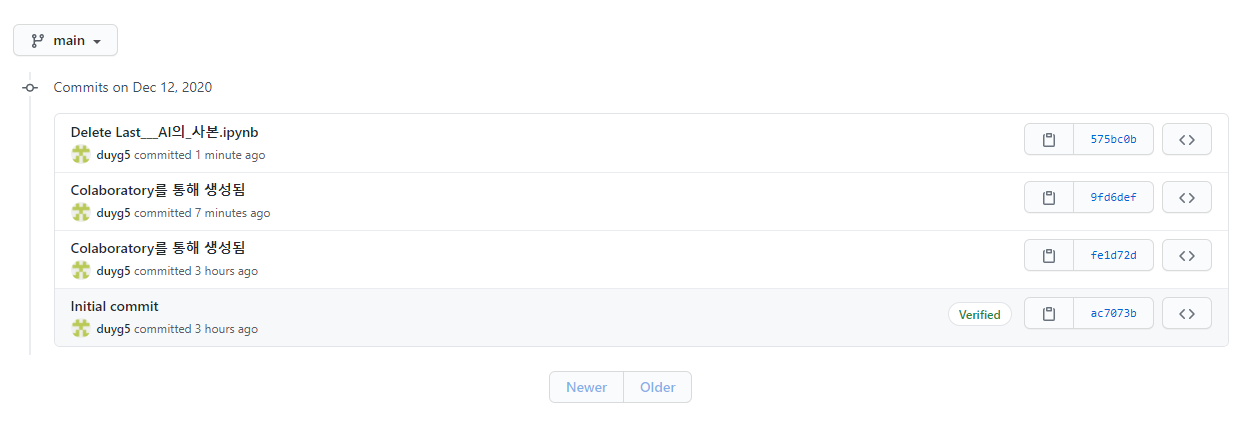
